<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final: Melanie Andrea Muñoz Chavarria

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



In [209]:
#Librerías
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sy
import scipy as sc

Solución númerica de la ecuación diferencial

In [210]:
def trans_calor(pvi,x,T_inf,h,p,k,Ac):
  #Reduciendo el gradod e la EDO w=dtheta/dt
  theta=pvi[0]
  a=((h*p)/(k*Ac))

  dtetha_dt=pvi[1]
  dw_dt=(a**2)*(theta)

  T=np.array([dtetha_dt,dw_dt])
  return T

In [211]:
#Parametros
T_inf=300
T_0=313
Ac=5e-5
k=200
p=0.102
h=20
#Los parametros inciailes
dT=-13*np.sqrt((h*p)/(Ac*k))
pvi=np.array([T_0-T_inf,dT])

#Definiendo el intervalo donde se va asolucionar la EDO

x=np.linspace(0,1,100)

#Ahora utlizamos la librería scipy para solucionar la EDO

sol=odeint(trans_calor,pvi,x,args=(T_inf,h,p,k,Ac))

Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

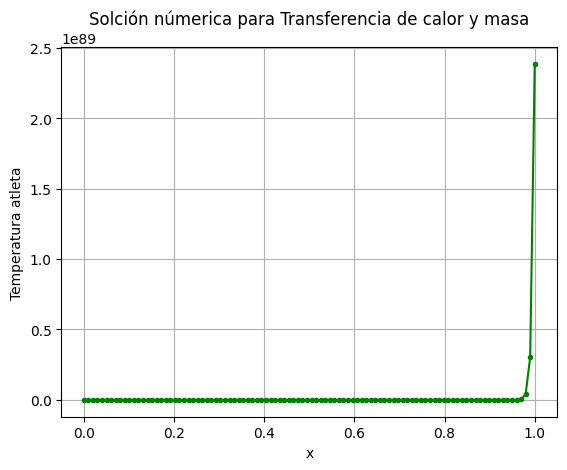

In [212]:
plt.figure()
plt.plot(x,sol[:,0],'-g.')
plt.xlabel('x')
plt.ylabel('Temperatura atleta')
plt.title('Solción númerica para Transferencia de calor y masa')
plt.grid()

Compare la solución numérica con la analítica

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}

In [213]:
#La solcuión análitica está dada por

#Parametros
T_inf=300
T_0=313
Ac=5e-5
k=200
p=0.102
h=20
#Los parametros inciailes
def sol_a(x,T,T_inf,h,p,k,Ac):
  a=((h*p)/(k*Ac))
  return T_inf+(T-T_inf)*np.exp((-x)*np.sqrt(a))

T_x=sol_a(x,T_0,T_inf,h,p,k,Ac)


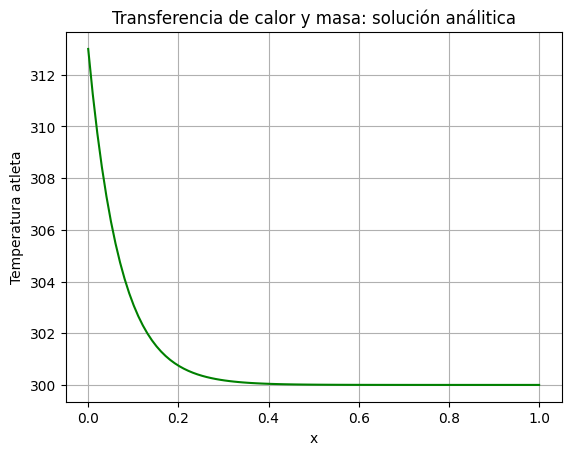

In [214]:
plt.figure()
plt.plot(x,T_x,'g')
plt.title('Transferencia de calor y masa: solución análitica')
plt.xlabel('x')
plt.ylabel('Temperatura atleta')
plt.grid()


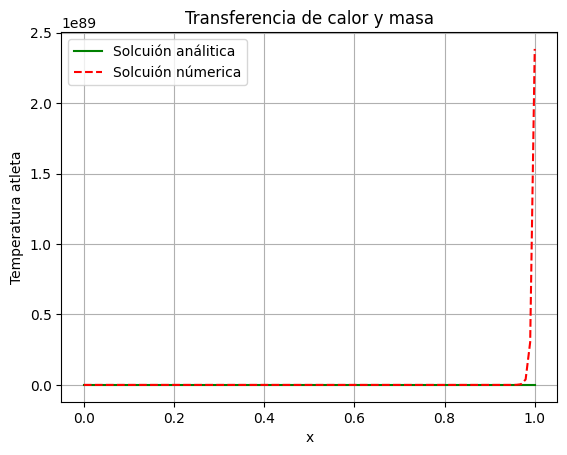

In [215]:
#Comparando los resultados
plt.figure()
plt.plot(x,T_x,'g',label='Solcuión análitica')
plt.plot(x,sol[:,0],'r--', label='Solcuión númerica')
plt.title('Transferencia de calor y masa')
plt.xlabel('x')
plt.ylabel('Temperatura atleta')
plt.grid()
plt.legend(loc='best')

Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K

In [216]:
#Parametros
T_inf=300
T_0=313
Ac=5e-5
k=200
p=0.102
h=20
#Los parametros inciailes
a=(h*p)/(k*Ac)
theta=T_0-T_inf

#Función igualandola a 305
y=lambda x:-305+T_inf +theta*np.exp(np.sqrt(a)*-x)


#Cálculando la raiz
raiz=sc.optimize.newton(y,0)

print(f'El punto en el que la temperatura es de 305k es {raiz}')

El punto en el que la temperatura es de 305k es 0.06689918232663293
